In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import re

import pytesseract
from PIL import Image

In [2]:
img = Image.open('../bill_2.JPG')

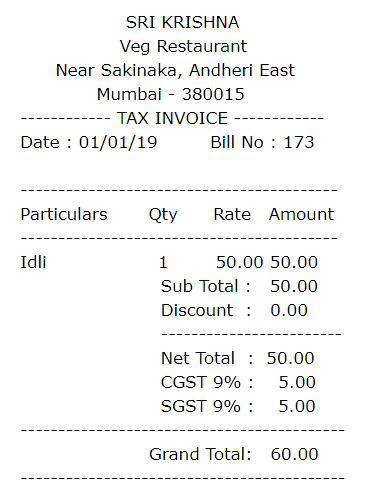

In [3]:
img

In [4]:
#config = ('--tessdata-dir "../tessdata/eng.traineddata" -l eng --oem 1 --psm 3')
text=pytesseract.image_to_string(img)

In [5]:
text

'SRI KRISHNA\nVeg Restaurant\n\nNear Sakinaka, Andheri East\n\nMumbai - 380015\n\n--- TAX INVOICE -\n\nDate : 01/01/19 Bill No : 173\n\n \n\n  \n\nIdli 1 50.00 50.00\nSub Total: 50.00\nDiscount : 0.00\n\n \n\nNet Total : 50.00\nCGST9%: 5.00\nSGST 9%: 5.00'

In [16]:
processed_text =  text.split('\n')
processed_text

['SRI KRISHNA',
 'Veg Restaurant',
 '',
 'Near Sakinaka, Andheri East',
 '',
 'Mumbai - 380015',
 '',
 '--- TAX INVOICE -',
 '',
 'Date : 01/01/19 Bill No : 173',
 '',
 ' ',
 '',
 '  ',
 '',
 'Idli 1 50.00 50.00',
 'Sub Total: 50.00',
 'Discount : 0.00',
 '',
 ' ',
 '',
 'Net Total : 50.00',
 'CGST9%: 5.00',
 'SGST 9%: 5.00']

In [7]:
processed_text = list(filter(None, processed_text))
processed_text

['SRI KRISHNA',
 'Veg Restaurant',
 'Near Sakinaka, Andheri East',
 'Mumbai - 380015',
 '--- TAX INVOICE -',
 'Date : 01/01/19 Bill No : 173',
 ' ',
 '  ',
 'Idli 1 50.00 50.00',
 'Sub Total: 50.00',
 'Discount : 0.00',
 ' ',
 'Net Total : 50.00',
 'CGST9%: 5.00',
 'SGST 9%: 5.00']

In [8]:
df = pd.DataFrame(processed_text, columns=['text'])
df

,text
0,SRI KRISHNA
1,Veg Restaurant
2,"Near Sakinaka, Andheri East"
3,Mumbai - 380015
4,--- TAX INVOICE -
5,Date : 01/01/19 Bill No : 173
6,
7,
8,Idli 1 50.00 50.00
9,Sub Total: 50.00


In [9]:
#pattern = r'^[A-Za-z].*[0-9]$'

pattern = r"^[A-Za-z].*[0-9]$"

df_clean = df[df.text.str.contains(pattern) == True]

In [10]:
df_clean[df_clean.text.str.contains('GST', case = False) == True]

,text
13,CGST9%: 5.00
14,SGST 9%: 5.00


In [11]:
# r"(^[A-Za-z].*[0-9])" 
#  (?P<letter>[a-zA-Z])([0-9]+)

#df_clean.text.str.extract(r'([A-Za-z].*)([0-9]+)')

In [12]:
df_clean

,text
3,Mumbai - 380015
5,Date : 01/01/19 Bill No : 173
8,Idli 1 50.00 50.00
9,Sub Total: 50.00
10,Discount : 0.00
12,Net Total : 50.00
13,CGST9%: 5.00
14,SGST 9%: 5.00


In [27]:
df_clean.text.str.split(r'\B:|-|\B', expand=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1461: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


3                    [Mumbai ,  380015]
5     [Date ,  01/01/19 Bill No ,  173]
8                  [Idli 1 50.00 50.00]
9                    [Sub Total: 50.00]
10                   [Discount ,  0.00]
12                 [Net Total ,  50.00]
13                      [CGST9%,  5.00]
14                     [SGST 9%,  5.00]
Name: text, dtype: object